In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mtick # used to format axis ticks

# Separate calls into distinct categories

In [2]:
# import and clean the data
df = pd.read_excel('./Mold Call Log - backup 10.6.22.xlsx', sheet_name='Stats', skiprows=6)
df = df.drop(['Unnamed: 2', 'Unnamed: 4'], axis=1)
df = df.drop([12, 13])
df = df.rename(columns={'Calls per Month': 'Month', 'Unnamed: 1': '2021 Totals', 'Unnamed: 3': '2022 Totals'})
df = df.set_index('Month', drop=True)
df['2021 Totals'] = df['2021 Totals'].astype('int')
df['2022 Totals'] = df['2022 Totals'].astype('int')

# import 2021 sheet
df2021 = pd.read_excel('./Mold Call Log - backup 10.6.22.xlsx', sheet_name='Mold Calls 2021')

# drop unneccessary rows
df2021 = df2021[['Date', 'Called', 'Scheduled', 'Completed']]

# add month column
df2021['Month'] = pd.DatetimeIndex(df2021['Date']).month_name()

# import 2022 sheet
df2022 = pd.read_excel('./Mold Call Log - backup 10.6.22.xlsx', sheet_name='Mold Calls 2022')

# drop unneccessary rows
df2022 = df2022[['Date', 'Called', 'Scheduled', 'Completed\nor\nCancelled']]

# rename 'Completed\nor\nCancelled' to 'Completed' to work with function
df2022.rename({'Completed\nor\nCancelled': 'Completed'}, axis=1, inplace=True)

# add month column
df2022['Month'] = pd.DatetimeIndex(df2022['Date']).month_name()

In [4]:
# create functions to calc categories

def count_call_categories2021(df_to_iterate, df_to_output):
    # calc calls that were scheduled
    counts_scheduled = df_to_iterate['Scheduled'].notnull().groupby(df_to_iterate['Month']).sum()
    df_to_output['2021 Scheduled'] = df_to_output.index.map(counts_scheduled)
    
    #calc calls that did not call us back
    counts_called = (df_to_iterate['Called'].notnull() &
                     df_to_iterate['Scheduled'].isnull() &
                     df_to_iterate['Completed'].isnull()).groupby(df_to_iterate['Month']).sum()
    df_to_output['2021 Did not call back'] = df_to_output.index.map(counts_called)
    
    # count calls that cancelled
    counts_cancelled = (df_to_iterate['Scheduled'].isnull() &
                        df_to_iterate['Completed'].notnull()).groupby(df_to_iterate['Month']).sum()
    df_to_output['2021 Cancelled'] = df_to_output.index.map(counts_cancelled)
    
    # calc calls that WE never returned
    counts_missed = (df_to_iterate['Called'].isnull() &
                    df_to_iterate['Scheduled'].isnull() &
                    df_to_iterate['Completed'].isnull()).groupby(df_to_iterate['Month']).sum()
    df_to_output['2021 Missed'] = df_to_output.index.map(counts_missed)
    
    return df_to_output

def count_call_categories2022(df_to_iterate, df_to_output):
    # calc calls that were scheduled
    counts_scheduled = df_to_iterate['Scheduled'].notnull().groupby(df_to_iterate['Month']).sum()
    df_to_output['2022 Scheduled'] = df_to_output.index.map(counts_scheduled)
    
    #calc calls that did not call us back
    counts_called = (df_to_iterate['Called'].notnull() &
                     df_to_iterate['Scheduled'].isnull() &
                     df_to_iterate['Completed'].isnull()).groupby(df_to_iterate['Month']).sum()
    df_to_output['2022 Did not call back'] = df_to_output.index.map(counts_called)
    
    # count calls that cancelled
    counts_cancelled = (df_to_iterate['Scheduled'].isnull() &
                        df_to_iterate['Completed'].notnull()).groupby(df_to_iterate['Month']).sum()
    df_to_output['2022 Cancelled'] = df_to_output.index.map(counts_cancelled)
    
    # calc calls that WE never returned
    counts_missed = (df_to_iterate['Called'].isnull() &
                    df_to_iterate['Scheduled'].isnull() &
                    df_to_iterate['Completed'].isnull()).groupby(df_to_iterate['Month']).sum()
    df_to_output['2022 Missed'] = df_to_output.index.map(counts_missed)
    
    return df_to_output

# run functions
count_call_categories2021(df2021, df)
count_call_categories2022(df2022, df)

,2021 Totals,2022 Totals,2021 Scheduled,2021 Did not call back,2021 Cancelled,2021 Missed,2022 Scheduled,2022 Did not call back,2022 Cancelled,2022 Missed
Month,,,,,,,,,,
January,0,30,NaN,NaN,NaN,NaN,16.0,11.0,3.0,0.0
February,0,18,NaN,NaN,NaN,NaN,10.0,2.0,1.0,5.0
March,18,25,8.0,4.0,6.0,0.0,14.0,5.0,1.0,5.0
April,16,20,14.0,2.0,0.0,0.0,13.0,3.0,1.0,3.0
May,15,17,10.0,4.0,1.0,0.0,10.0,5.0,2.0,0.0
June,18,13,13.0,5.0,0.0,0.0,5.0,7.0,1.0,0.0
July,25,22,11.0,13.0,1.0,0.0,14.0,7.0,1.0,0.0
August,28,36,18.0,10.0,0.0,0.0,19.0,16.0,1.0,0.0
September,42,36,15.0,22.0,5.0,0.0,23.0,11.0,2.0,0.0


In [5]:
# reorder columns
cols = list(df.columns.values)
cols
df = df[['2021 Totals', '2021 Scheduled', '2021 Did not call back', '2021 Cancelled', '2021 Missed',
         '2022 Totals', '2022 Scheduled', '2022 Did not call back', '2022 Cancelled', '2022 Missed']]

In [6]:
# fill in missing data for Jan, Feb 2021 & Oct, Nov, Dec 2022

# below does not work for working across rows
# df.loc['January'].replace({'2021 Totals': {0:22}, '2021 Scheduled': {np.nan:13}, 
#                            '2021 Did not call back': {np.nan:9}, '2021 Cancelled': {np.nan:0},
#                            '2021 Missed': {np.nan:0}}, inplace=True)

# run this after running calc functions
df.loc['January', '2021 Totals'] = 22
df.loc['January', '2021 Scheduled'] = 13
df.loc['January', '2021 Did not call back'] = 9
df.loc['January', '2021 Cancelled'] = 0
df.loc['January', '2021 Missed'] = 0

df.loc['February', '2021 Totals'] = 15
df.loc['February', '2021 Scheduled'] = 7
df.loc['February', '2021 Did not call back'] = 8
df.loc['February', '2021 Cancelled'] = 0
df.loc['February', '2021 Missed'] = 0

df.loc['October', '2022 Totals'] = 41
df.loc['October', '2022 Scheduled'] = 29
df.loc['October', '2022 Did not call back'] = 10
df.loc['October', '2022 Cancelled'] = 0
df.loc['October', '2022 Missed'] = 2

df.loc['November', '2022 Totals'] = 32
df.loc['November', '2022 Scheduled'] = 19
df.loc['November', '2022 Did not call back'] = 9
df.loc['November', '2022 Cancelled'] = 1
df.loc['November', '2022 Missed'] = 3

df.loc['December', '2022 Totals'] = 16
df.loc['December', '2022 Scheduled'] = 11
df.loc['December', '2022 Did not call back'] = 5
df.loc['December', '2022 Cancelled'] = 0
df.loc['December', '2022 Missed'] = 0

df

,2021 Totals,2021 Scheduled,2021 Did not call back,2021 Cancelled,2021 Missed,2022 Totals,2022 Scheduled,2022 Did not call back,2022 Cancelled,2022 Missed
Month,,,,,,,,,,
January,22,13.0,9.0,0.0,0.0,30,16.0,11.0,3.0,0.0
February,15,7.0,8.0,0.0,0.0,18,10.0,2.0,1.0,5.0
March,18,8.0,4.0,6.0,0.0,25,14.0,5.0,1.0,5.0
April,16,14.0,2.0,0.0,0.0,20,13.0,3.0,1.0,3.0
May,15,10.0,4.0,1.0,0.0,17,10.0,5.0,2.0,0.0
June,18,13.0,5.0,0.0,0.0,13,5.0,7.0,1.0,0.0
July,25,11.0,13.0,1.0,0.0,22,14.0,7.0,1.0,0.0
August,28,18.0,10.0,0.0,0.0,36,19.0,16.0,1.0,0.0
September,42,15.0,22.0,5.0,0.0,36,23.0,11.0,2.0,0.0


In [61]:
# check to make sure sum of categories equals totals
df.loc['November', '2022 Totals'] == df.loc['November', '2022 Scheduled': '2022 Missed'].sum()

True

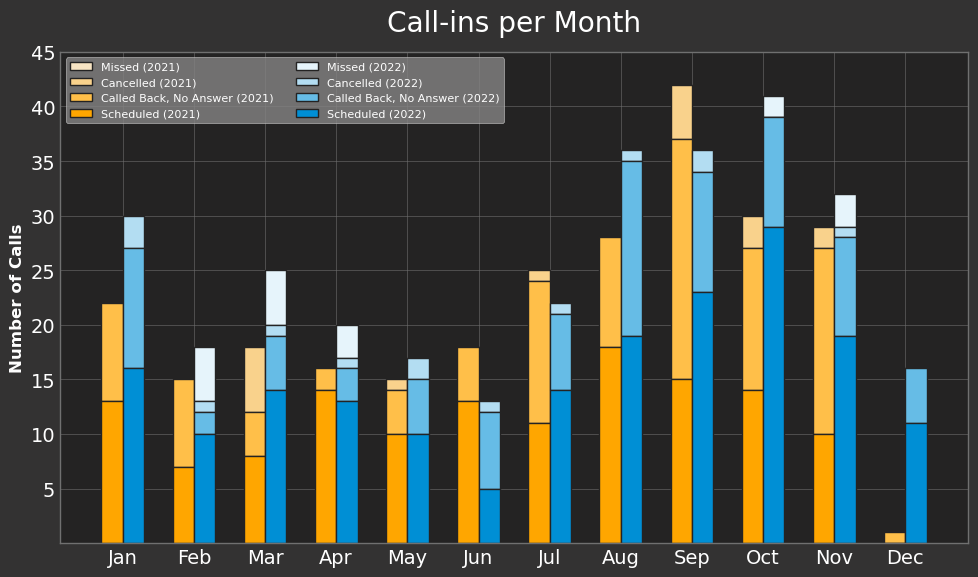

In [162]:
# plot

plt.style.use('fivethirtyeight')

x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_indexes = np.arange(len(x_labels))
y_labels = [5, 45] # used to set min and max labels

sched2021 = df['2021 Scheduled']
called2021 = df['2021 Did not call back']
canc2021 = df['2021 Cancelled']
miss2021 = df['2021 Missed']
sched2022 = df['2022 Scheduled']
called2022 = df['2022 Did not call back']
canc2022 = df['2022 Cancelled']
miss2022 = df['2022 Missed']

width = 0.3
linewidth = 1.0

text_color = 'white'
edgecolor = '#242323'
bg_facecolor = '#333232'
# alpha = 

# creating stacked bars
fig, ax = plt.subplots(figsize=(10,6), facecolor=bg_facecolor)

# 2021 bars
ax.bar(x=x_indexes - 0.15, height=miss2021, label='Missed (2021)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=orange[3], bottom=sched2021+called2021+canc2021)
ax.bar(x=x_indexes - 0.15, height=canc2021, label='Cancelled (2021)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=orange[2], bottom=sched2021+called2021)
ax.bar(x=x_indexes - 0.15, height=called2021, label='Called Back, No Answer (2021)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=orange[1], bottom=sched2021)
ax.bar(x=x_indexes - 0.15, height=sched2021, label='Scheduled (2021)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=orange[0])
# 2022 bars
ax.bar(x=x_indexes + 0.15, height=miss2022, label='Missed (2022)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=blues[3], bottom=sched2022+called2022+canc2022)
ax.bar(x=x_indexes + 0.15, height=canc2022, label='Cancelled (2022)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=blues[2], bottom=sched2022+called2022)
ax.bar(x=x_indexes + 0.15, height=called2022, label='Called Back, No Answer (2022)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=blues[1], bottom=sched2022)
ax.bar(x=x_indexes + 0.15, height=sched2022, label='Scheduled (2022)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=blues[0])

# ticks
ax.set_xticks(ticks=x_indexes, labels=x_labels)
ax.set_yticks(ticks=np.arange(min(y_labels), max(y_labels)+1, 5))
ax.tick_params(labelcolor=text_color)

# grid, grid background, spines
plt.grid(color='#707070', linewidth=0.4)
ax.set_facecolor('#242323')
plt.setp(ax.spines.values(), color='#707070', linewidth=1.0)

# titles, legend
plt.title('Call-ins per Month', color=text_color, weight='medium', pad=15)
#plt.xlabel('Months', color=text_color, fontsize=12, fontweight='bold')
plt.ylabel('Number of Calls', color=text_color, fontsize=12, fontweight='bold')
ax.legend(fontsize=8, ncol=2, loc='best',
          facecolor='#858484', labelcolor=text_color)

plt.tight_layout()
# plt.savefig('Call-ins Stacked.png', dpi=300, bbox_inches='tight', facecolor=bg_facecolor)
plt.show()

# What percent of calls are we scheduling each month?

In [ ]:
# Hypothesis: after tracking calls in 2021, we should have been better prepared in 2022 
# and scheduled more calls during busy season. Ideally percent scheduled for 2022 should be higher

In [8]:
# calc percent scheduled out of total calls for each month

def calc_percent2021(df):
    # calc percent for 2021
    percent_scheduled2021 = round((df['2021 Scheduled'] / df['2021 Totals'] * 100).groupby(df.index).sum(), 2)
    df['2021 Percent Scheduled'] = df.index.map(percent_scheduled2021)
    
    percent_scheduled2022 = round((df['2022 Scheduled'] / df['2022 Totals'] * 100).groupby(df.index).sum(), 2)
    df['2022 Percent Scheduled'] = df.index.map(percent_scheduled2022)
    
    return df
    
# run functions    
calc_percent(df)

/var/folders/ll/77znv_6d7jng9_kjkpdllhbh0000gn/T/ipykernel_11371/827537554.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2021 Percent Scheduled'] = df.index.map(percent_scheduled)
/var/folders/ll/77znv_6d7jng9_kjkpdllhbh0000gn/T/ipykernel_11371/827537554.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2022 Percent Scheduled'] = df.index.map(percent_scheduled)


,2021 Totals,2021 Scheduled,2021 Did not call back,2021 Cancelled,2021 Missed,2022 Totals,2022 Scheduled,2022 Did not call back,2022 Cancelled,2022 Missed,2021 Percent Scheduled,2022 Percent Scheduled
Month,,,,,,,,,,,,
January,22,13.0,9.0,0.0,0.0,30,16.0,11.0,3.0,0.0,59.09,53.33
February,15,7.0,8.0,0.0,0.0,18,10.0,2.0,1.0,5.0,46.67,55.56
March,18,8.0,4.0,6.0,0.0,25,14.0,5.0,1.0,5.0,44.44,56.00
April,16,14.0,2.0,0.0,0.0,20,13.0,3.0,1.0,3.0,87.50,65.00
May,15,10.0,4.0,1.0,0.0,17,10.0,5.0,2.0,0.0,66.67,58.82
June,18,13.0,5.0,0.0,0.0,13,5.0,7.0,1.0,0.0,72.22,38.46
July,25,11.0,13.0,1.0,0.0,22,14.0,7.0,1.0,0.0,44.00,63.64
August,28,18.0,10.0,0.0,0.0,36,19.0,16.0,1.0,0.0,64.29,52.78
September,42,15.0,22.0,5.0,0.0,36,23.0,11.0,2.0,0.0,35.71,63.89


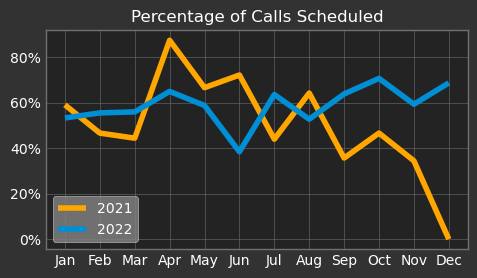

In [157]:
# plot percentages

x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
x_indexes = np.arange(len(x_labels))
y_labels = [0, 90]

width = 0.3

bg_facecolor = '#333232'
text_color = 'white'


fig, ax2 = plt.subplots(figsize=(5, 3), facecolor=bg_facecolor)

# ax2.bar(x=x_indexes - 0.15, height=df['2021 Percent Scheduled'], label='2021', width=width, color=greys[0])
# ax2.bar(x=x_indexes + 0.15, height=df['2022 Percent Scheduled'], label='2022', width=width, color=blues[0])
ax2.plot(df['2021 Percent Scheduled'], label='2021', color=orange[0])
ax2.plot(df['2022 Percent Scheduled'], label='2022', color=blues[0])

# ticks
ax2.set_xticks(ticks=x_indexes, labels=x_labels)
ax2.set_yticks(ticks=np.arange(min(y_labels), max(y_labels), 20))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter()) # formats y axis as %
ax2.tick_params(labelcolor=text_color, labelsize=10)

# grid, grid background, spines
plt.grid(color='#707070', linewidth=0.4)
ax2.set_facecolor('#242323')
plt.setp(ax2.spines.values(), color='#707070', linewidth=1.0)

# titles, legend, axis labels
ax2.set_title('Percentage of Calls Scheduled', fontsize=12, color=text_color, fontweight='medium')
ax2.legend(fontsize=10, loc='lower left',
          facecolor='#858484', labelcolor=text_color) # would rather have lines labeled - figure out how to do that

plt.tight_layout()
# plt.savefig('Percentage of Calls Scheduled.png', dpi=300, bbox_inches='tight', facecolor=bg_facecolor)
plt.show()

# Minimum revenue earned from scheduled calls vs. minimum possible from total calls

In [28]:
def revenue(df):
    minimum_cost = 525
    # calc minimum rev earned per month
    min_earned2021 = (df['2021 Scheduled'] * minimum_cost).groupby(df.index).sum()
    min_earned2022 = (df['2022 Scheduled'] * minimum_cost).groupby(df.index).sum()
    df['2021 Minimum Revenue Earned'] = df.index.map(min_earned2021)
    df['2022 Minimum Revenue Earned'] = df.index.map(min_earned2022)
    
    # calc minimum revenue possible if all calls were scheduled
    min_possible2021 = (df['2021 Totals'] * minimum_cost).groupby(df.index).sum()
    min_possible2022 = (df['2022 Totals'] * minimum_cost).groupby(df.index).sum()
    
    df['2021 Minimum Revenue Possible'] = df.index.map(min_possible2021)
    df['2022 Minimum Revenue Possible'] = df.index.map(min_possible2022)
    
    return df

# run function
revenue(df)

/var/folders/ll/77znv_6d7jng9_kjkpdllhbh0000gn/T/ipykernel_11371/2846590090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2021 Minimum Revenue Earned'] = df.index.map(min_earned2021)
/var/folders/ll/77znv_6d7jng9_kjkpdllhbh0000gn/T/ipykernel_11371/2846590090.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2022 Minimum Revenue Earned'] = df.index.map(min_earned2022)
/var/folders/ll/77znv_6d7jng9_kjkpdllhbh0000gn/T/ipykernel_11371/2846590090.py:13: SettingWithCopyWarning: 
A value is trying 

,2021 Totals,2021 Scheduled,2021 Did not call back,2021 Cancelled,2021 Missed,2022 Totals,2022 Scheduled,2022 Did not call back,2022 Cancelled,2022 Missed,2021 Percent Scheduled,2022 Percent Scheduled,2021 Minimum Revenue Earned,2022 Minimum Revenue Earned,2021 Minimum Revenue Possible,2022 Minimum Revenue Possible
Month,,,,,,,,,,,,,,,,
January,22,13.0,9.0,0.0,0.0,30,16.0,11.0,3.0,0.0,59.09,53.33,6825.0,8400.0,11550,15750
February,15,7.0,8.0,0.0,0.0,18,10.0,2.0,1.0,5.0,46.67,55.56,3675.0,5250.0,7875,9450
March,18,8.0,4.0,6.0,0.0,25,14.0,5.0,1.0,5.0,44.44,56.00,4200.0,7350.0,9450,13125
April,16,14.0,2.0,0.0,0.0,20,13.0,3.0,1.0,3.0,87.50,65.00,7350.0,6825.0,8400,10500
May,15,10.0,4.0,1.0,0.0,17,10.0,5.0,2.0,0.0,66.67,58.82,5250.0,5250.0,7875,8925
June,18,13.0,5.0,0.0,0.0,13,5.0,7.0,1.0,0.0,72.22,38.46,6825.0,2625.0,9450,6825
July,25,11.0,13.0,1.0,0.0,22,14.0,7.0,1.0,0.0,44.00,63.64,5775.0,7350.0,13125,11550
August,28,18.0,10.0,0.0,0.0,36,19.0,16.0,1.0,0.0,64.29,52.78,9450.0,9975.0,14700,18900
September,42,15.0,22.0,5.0,0.0,36,23.0,11.0,2.0,0.0,35.71,63.89,7875.0,12075.0,22050,18900


# Combine all charts into one figure

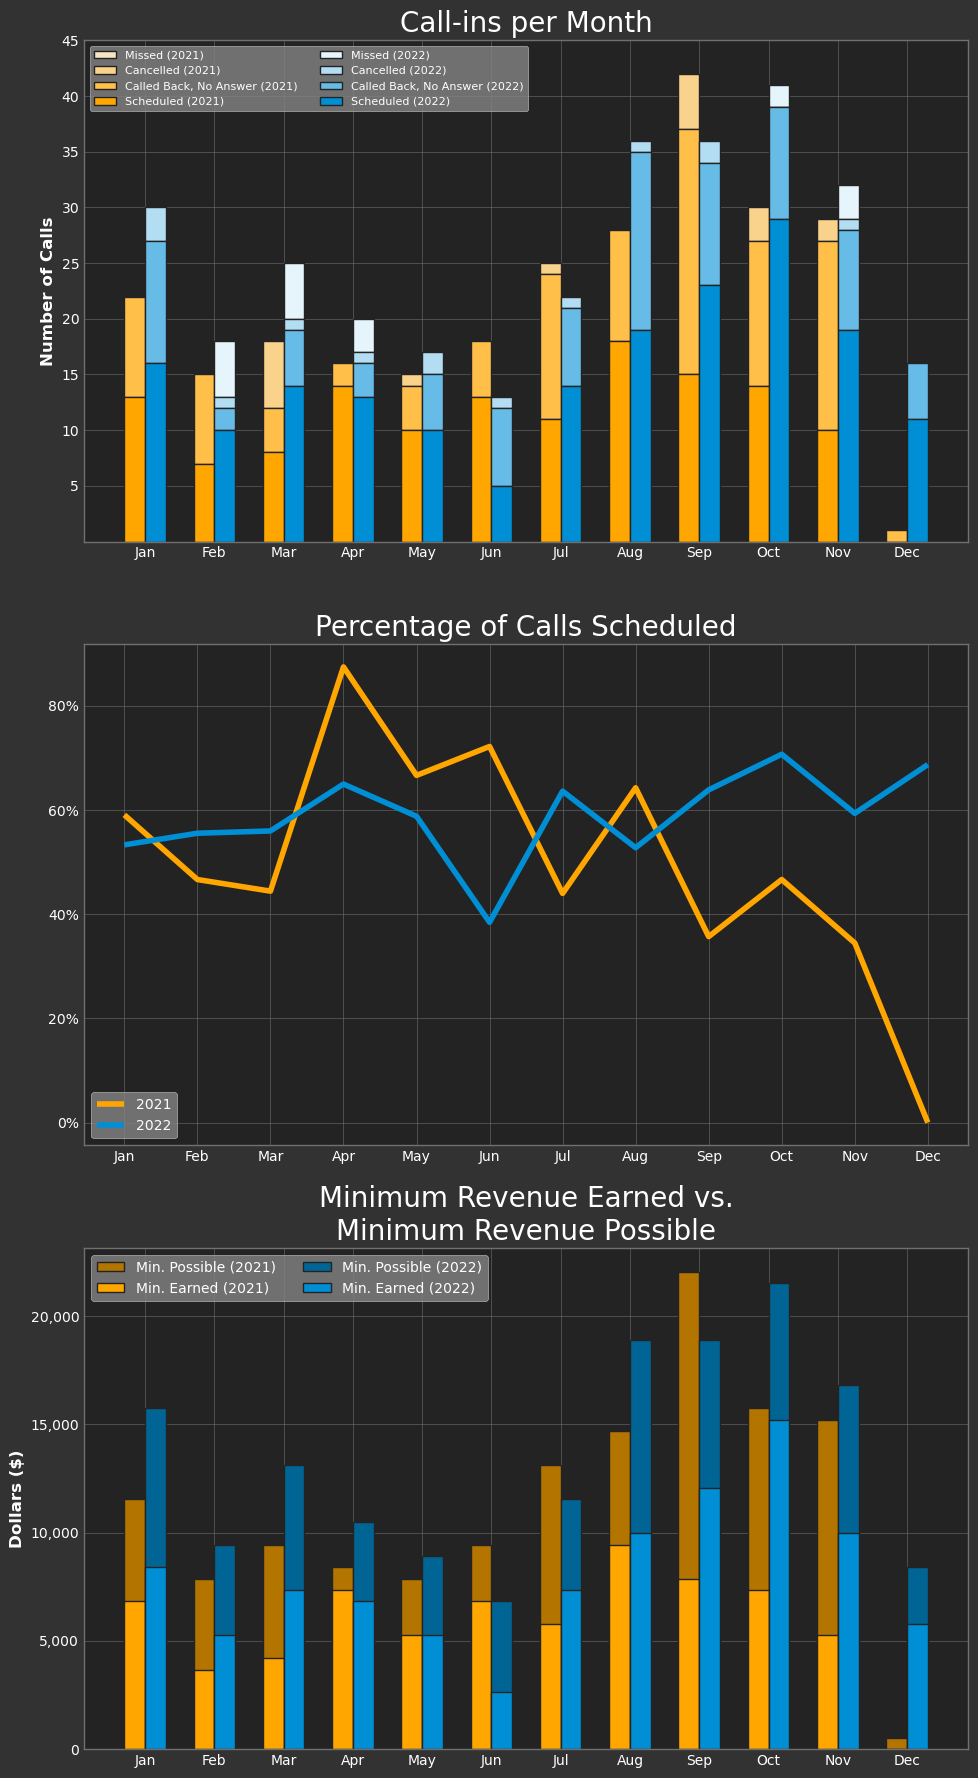

In [58]:
plt.style.use('fivethirtyeight')

x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_indexes = np.arange(len(x_labels))
y_labels3 = [5, 45] # used to set min and max labels
y_labels4 = [0, 90]

sched2021 = df['2021 Scheduled']
called2021 = df['2021 Did not call back']
canc2021 = df['2021 Cancelled']
miss2021 = df['2021 Missed']
sched2022 = df['2022 Scheduled']
called2022 = df['2022 Did not call back']
canc2022 = df['2022 Cancelled']
miss2022 = df['2022 Missed']

width = 0.3
linewidth = 1.0

text_color = 'white'
edgecolor = '#242323'
bg_facecolor = '#333232'
# alpha = 

# creating stacked bars
fig, (ax3, ax4, ax5) = plt.subplots(3, 1, figsize=(10,18), facecolor=bg_facecolor)

# 2021 bars
ax3.bar(x=x_indexes - 0.15, height=miss2021, label='Missed (2021)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=orange[3], bottom=sched2021+called2021+canc2021)
ax3.bar(x=x_indexes - 0.15, height=canc2021, label='Cancelled (2021)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=orange[2], bottom=sched2021+called2021)
ax3.bar(x=x_indexes - 0.15, height=called2021, label='Called Back, No Answer (2021)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=orange[1], bottom=sched2021)
ax3.bar(x=x_indexes - 0.15, height=sched2021, label='Scheduled (2021)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=orange[0])
# 2022 bars
ax3.bar(x=x_indexes + 0.15, height=miss2022, label='Missed (2022)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=blues[3], bottom=sched2022+called2022+canc2022)
ax3.bar(x=x_indexes + 0.15, height=canc2022, label='Cancelled (2022)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=blues[2], bottom=sched2022+called2022)
ax3.bar(x=x_indexes + 0.15, height=called2022, label='Called Back, No Answer (2022)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=blues[1], bottom=sched2022)
ax3.bar(x=x_indexes + 0.15, height=sched2022, label='Scheduled (2022)', width=width, linewidth=linewidth,
       edgecolor=edgecolor, color=blues[0])

# lines
ax4.plot(df['2021 Percent Scheduled'], label='2021', color=orange[0])
ax4.plot(df['2022 Percent Scheduled'], label='2022', color=blues[0])

# revenue bars
ax5.bar(x=x_indexes-0.15, height=df['2021 Minimum Revenue Possible'], label='Min. Possible (2021)', 
        width=width, color=min_rev_possible2021, linewidth=linewidth, edgecolor=edgecolor)
ax5.bar(x=x_indexes-0.15, height=df['2021 Minimum Revenue Earned'], label='Min. Earned (2021)', width=width,
       color=orange[0], linewidth=linewidth, edgecolor=edgecolor)

ax5.bar(x=x_indexes+0.15, height=df['2022 Minimum Revenue Possible'], label='Min. Possible (2022)', 
        width=width, color=min_rev_possible2022, linewidth=linewidth, edgecolor=edgecolor)
ax5.bar(x=x_indexes+0.15, height=df['2022 Minimum Revenue Earned'], label='Min. Earned (2022)', width=width,
       color=blues[0], linewidth=linewidth, edgecolor=edgecolor)

# ticks
ax3.set_xticks(ticks=x_indexes, labels=x_labels)
ax3.set_yticks(ticks=np.arange(min(y_labels3), max(y_labels3)+1, 5))
ax3.tick_params(labelcolor=text_color, labelsize=10)

ax4.set_xticks(ticks=x_indexes, labels=x_labels)
ax4.set_yticks(ticks=np.arange(min(y_labels4), max(y_labels4), 20))
ax4.yaxis.set_major_formatter(mtick.PercentFormatter()) # formats y axis as %
ax4.tick_params(labelcolor=text_color, labelsize=10)

ax5.set_xticks(ticks=x_indexes, labels=x_labels)
ax5.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ','))) # formats numbers with comma
ax5.tick_params(labelcolor=text_color, labelsize=10)

# grid, grid background, spines
ax3.grid(color='#707070', linewidth=0.4)
ax3.set_facecolor('#242323')
plt.setp(ax3.spines.values(), color='#707070', linewidth=1.0)

ax4.grid(color='#707070', linewidth=0.4)
ax4.set_facecolor('#242323')
plt.setp(ax4.spines.values(), color='#707070', linewidth=1.0)

ax5.grid(color='#707070', linewidth=0.4)
ax5.set_facecolor('#242323')
plt.setp(ax5.spines.values(), color='#707070', linewidth=1.0)

# titles, legend
ax3.set_title('Call-ins per Month', color=text_color, weight='medium', fontsize=20)
ax3.set_ylabel('Number of Calls', color=text_color, fontsize=12, fontweight='bold')
ax3.legend(fontsize=8, ncol=2, loc='best',
          facecolor='#858484', labelcolor=text_color)

ax4.set_title('Percentage of Calls Scheduled', fontsize=20, color=text_color, fontweight='medium')
ax4.legend(fontsize=10, loc='lower left',
          facecolor='#858484', labelcolor=text_color)

ax5.set_title('Minimum Revenue Earned vs.\nMinimum Revenue Possible', fontsize=20, color=text_color, 
              fontweight='medium')
ax5.set_ylabel('Dollars ($)', color=text_color, fontsize=12, fontweight='bold')
ax5.legend(fontsize=10, ncol=2, loc='best', facecolor='#858484', labelcolor=text_color)


plt.tight_layout()
plt.savefig('Call-ins.pdf', dpi=1000, bbox_inches='tight', facecolor=bg_facecolor)
plt.show()

In [45]:
# color schemes
greys = ['#444444', '#757575', '#aaaaaa', '#e2e2e2']
sunset = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']
rose = ['#ff0062', '#ff5c87', '#ff8aa9', '#ffb2c7']
blues = ['#008fd5', '#66bce6', '#b3ddf2', '#e6f4fb']
lime = ['#D2F952', '#DAF57E', '#E9F9B1', '#F4FDD6']
orange = ['#FFA600', '#FFBF49', '#F9D28C', '#F7E4C3']
yellow = ['#D4CC4C', '#ddd374', '#e5db99', '#eae3bd']
YandO = ['#d4cc4c', '#e8bb28', '#ffa600', 'white']
min_rev_possible2021 = '#b37400'
min_rev_possible2022 = '#006495'